In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm 

In [2]:
def observations(T):
    x = [np.random.randn()]
    y = [x[-1]**2 / 2 + np.random.randn()]
    
    for t in range(1,T):
        x.append(0.5 * x[-1] + 25 * x[-1] / (1 + x[-1]**2) + 8 * np.cos(1.2*t) + np.sqrt(10) * np.random.randn())
        y.append(x[-1]**2 / 20 + np.random.randn())

    return x,y

Text(0.5, 1.0, 'Observations')

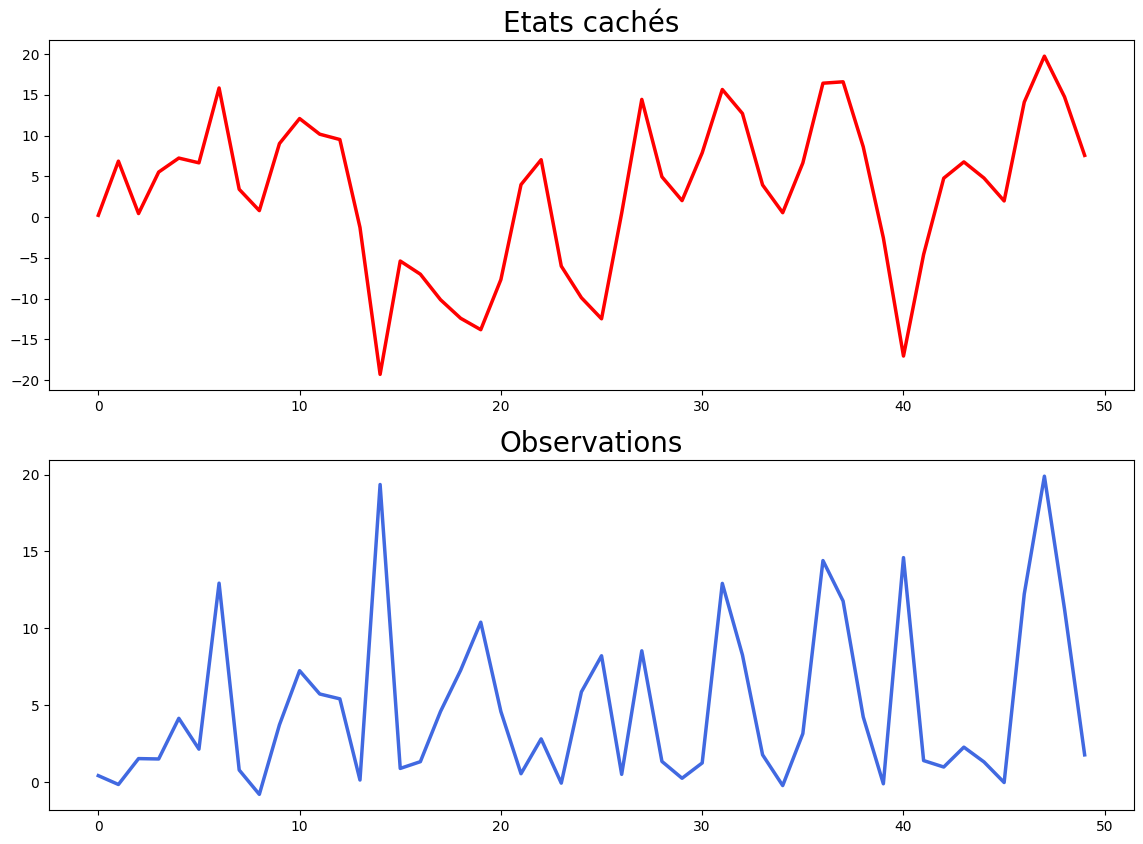

In [3]:
x,y = observations(50)

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (14,10))
ax[0].plot(range(0,50), x, linewidth = 2.5, color = 'red')
ax[1].plot(range(0,50), y, linewidth = 2.5, color = 'royalblue')

ax[0].set_title('Etats cachés', fontsize = 20)
ax[1].set_title('Observations', fontsize = 20)

In [4]:
 def reechantillonnage(xt_1, wt_1, t, n_particules):
    A  = np.random.choice(range(0,n_particules), n_particules, p = wt_1)
    xt = 0.5 * xt_1[A] + 25 * xt_1[A] / (1 + xt_1[A]**2) + 8 * np.cos(1.2*t)\
                + np.sqrt(10) * np.random.randn(n_particules,1)
    return xt
    
def filtre_particulaire(obs, n_particules):
    T = len(obs)
    x = np.random.randn(n_particules, 1)
    w = norm.pdf(obs[0], x**2 / 2, 1)
    w = w / w.sum()
    
    for t in range(1,T):
        
        xt = reechantillonnage(x[:,-1].reshape(-1,1), w[:,-1], t, n_particules)
        wt = norm.pdf(obs[t], xt**2 / 20, 1)
        wt = wt / wt.sum()
        
        x = np.hstack([x, xt])
        w = np.hstack([w, wt])
        
    return x,w 

In [5]:
xis, w = filtre_particulaire(y, 20000)

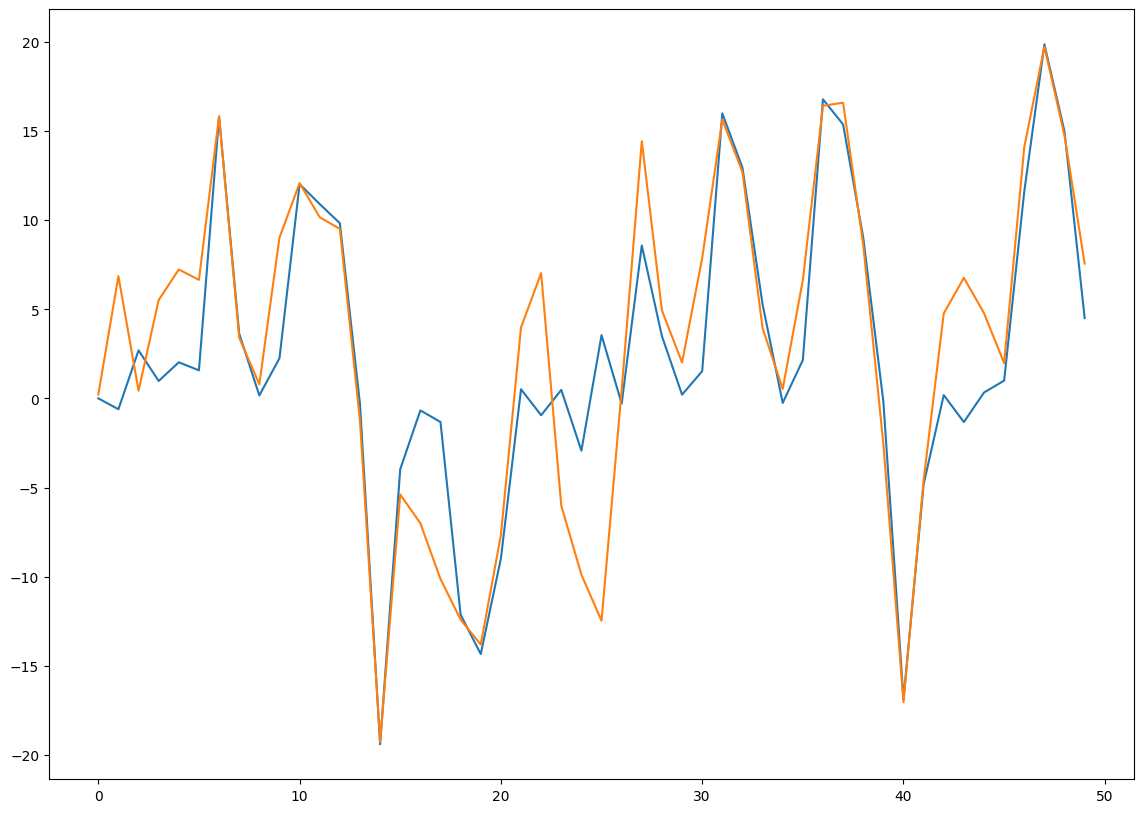

In [6]:
filter_ = (xis * w).sum(0)

plt.figure(figsize = (14,10))
plt.plot(filter_)
plt.plot(x)